### Proper motion graphs
//milliarcseconds per year

μ^2=μRA^2 + μDec^2

- if D is in kiloparsecs
- μ in milliarcseconds/year
- VT= μ/D (km/s)

VR^2 + VT^2 = V^2

In [2]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

In [80]:
#Functions for Proper Motion and Transverse Velocity
def pm(pmra, pmdec):
    return math.sqrt((pmra*pmra)+(pmdec*pmdec))

def vel_t(distance, pm):
    return pm*distance

def diff(pm, vel):
    return ((pm*vel)+pm)*.001

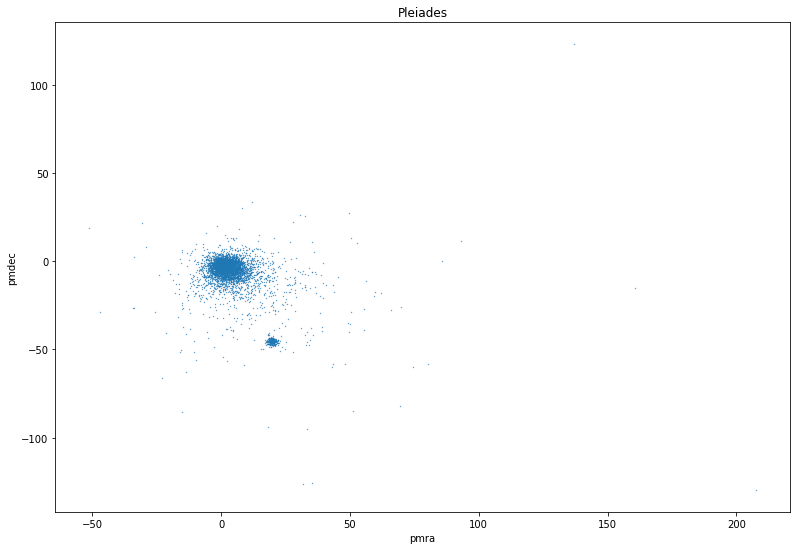

In [69]:
pleiades = pd.read_csv("pleiades.csv")
#Pleiades total
plt.scatter(pleiades['pmra'], pleiades['pmdec'], s=0.1)
#plt.xlim(-4, 4)
#plt.ylim(-6, 2)
#plt.xlim(15, 25)
#plt.ylim(-50, -40)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.title("Pleiades")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

In [79]:
pleiades = pleiades[['parallax', 'pmra', 'pmdec']]
pleiades.loc[:, 'parallax_arcsec'] = pleiades['parallax'].apply(lambda x: x*.001)
pleiades.loc[:, 'R_pc'] = pleiades['parallax_arcsec'].apply(distance)
pleiades.loc[:, 'R_kpc'] = pleiades['R_pc'].apply(lambda x: x*.001)
pleiades.loc[:, 'pm'] = pleiades.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
pleiades.loc[:, 'vel_t_km/s'] = pleiades.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
pleiades.loc[:, 'dx'] = pleiades.apply(lambda x: diff(x['pmra'], x['vel_t_km/s']), axis=1)
pleiades.loc[:, 'dy'] = pleiades.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s']), axis=1)
pleiades.head(10)

,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,0.449200,1.811370,-3.520140,0.000449,2226.178497,2.226178,3.958844,8.813094,0.017775,-0.034543
1,0.415548,3.821199,-0.520381,0.000416,2406.457978,2.406458,3.856469,9.280431,0.039284,-0.005350
2,1.542492,5.941891,-12.181140,0.001542,648.301564,0.648302,13.553090,8.786489,0.058150,-0.119211
3,0.864438,9.922333,-3.693149,0.000864,1156.820385,1.156820,10.587353,12.247665,0.131448,-0.048926
4,2.765235,-1.259323,-1.460526,0.002765,361.632870,0.361633,1.928479,0.697401,-0.002138,-0.002479
5,0.289109,5.258878,-0.038086,0.000289,3458.901919,3.458902,5.259016,18.190421,0.100920,-0.000731
6,1.564043,-3.812313,1.815595,0.001564,639.368751,0.639369,4.222572,2.699781,-0.014105,0.006717
7,0.257081,-0.369657,-6.633377,0.000257,3889.827275,3.889827,6.643669,25.842725,-0.009923,-0.178058
8,5.168245,2.396083,-56.614581,0.005168,193.489273,0.193489,56.665263,10.964121,0.028667,-0.677344
9,0.062865,0.492922,-0.210806,0.000063,15907.066571,15.907067,0.536107,8.527894,0.004697,-0.002009


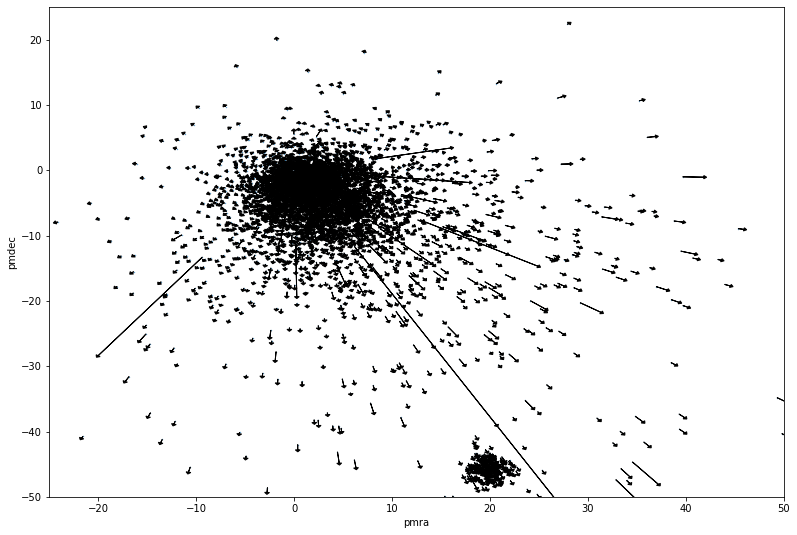

In [91]:
ax = plt.axes()
ax.scatter(pleiades['pmra'], pleiades['pmdec'], s=0.1)

#define arrows
arrow_starts = pleiades['pmra'].values
arrow_ends = pleiades['pmdec'].values

arrow_lengths_x = pleiades['dx'].values
arrow_lengths_y = pleiades['dy'].values

#add arrows to plot
for i, pm in enumerate(pleiades['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.5,        #arrow head width
             head_length=0.3,      #arrow head length
             width=0.005,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

plt.xlim(-25,50)
plt.ylim(-50,25)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

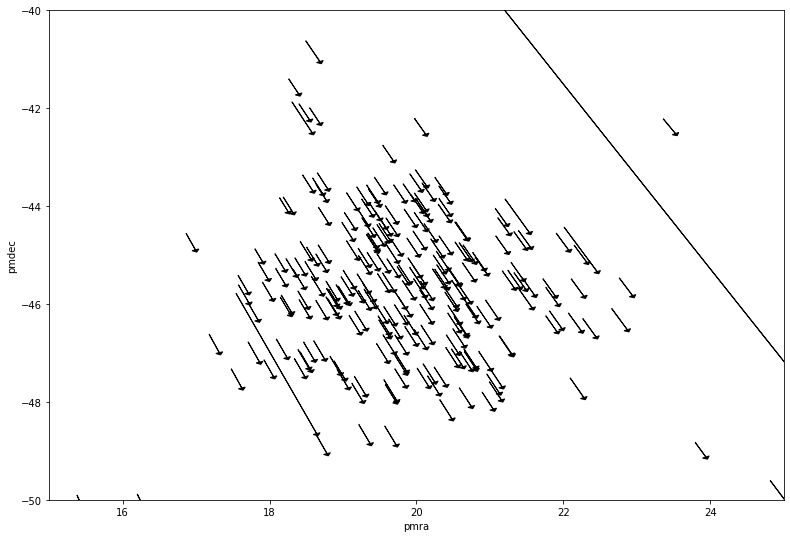

In [92]:
ax = plt.axes()
ax.scatter(pleiades['pmra'], pleiades['pmdec'], s=0.1)

#define arrows
arrow_starts = pleiades['pmra'].values
arrow_ends = pleiades['pmdec'].values

arrow_lengths_x = pleiades['dx'].values
arrow_lengths_y = pleiades['dy'].values

#add arrows to plot
for i, pm in enumerate(pleiades['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.1,         #arrow head width
             head_length=0.05,       #arrow head length
             width=0.001,             #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

plt.xlim(15,25)
plt.ylim(-50,-40)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

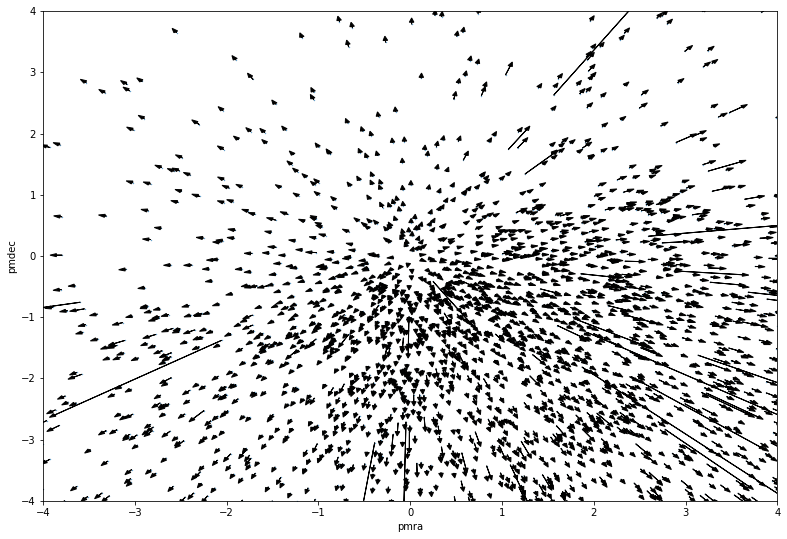

In [93]:
ax = plt.axes()
ax.scatter(pleiades['pmra'], pleiades['pmdec'], s=0.1)

#define arrows
arrow_starts = pleiades['pmra'].values
arrow_ends = pleiades['pmdec'].values

arrow_lengths_x = pleiades['dx'].values
arrow_lengths_y = pleiades['dy'].values

#add arrows to plot
for i, pm in enumerate(pleiades['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.05,         #arrow head width
             head_length=0.07,       #arrow head length
             width=0.001,           #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

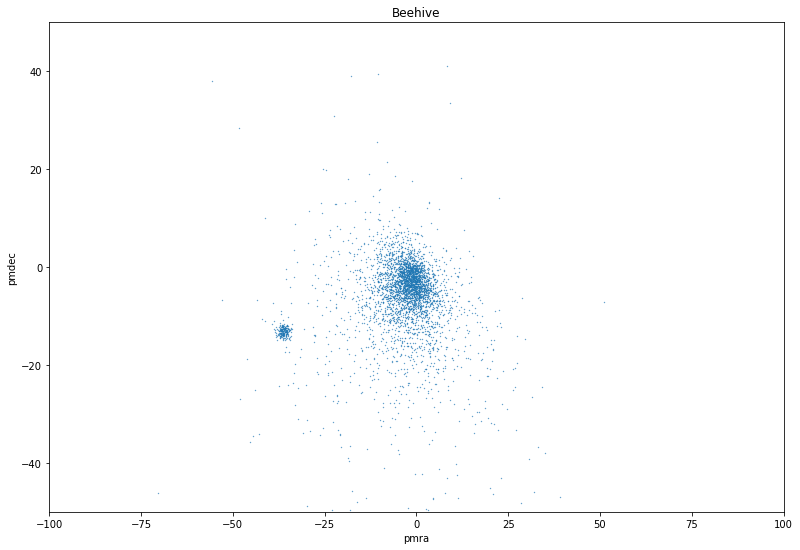

In [74]:
beehive = pd.read_csv("beehive.csv")
plt.scatter(beehive['pmra'], beehive['pmdec'], s=0.1)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-100, 100)
plt.ylim(-50, 50)
plt.title("Beehive")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

In [81]:
beehive = beehive[['parallax', 'pmra', 'pmdec']]
beehive.loc[:, 'parallax_arcsec'] = beehive['parallax'].apply(lambda x: x*.001)
beehive.loc[:, 'R_pc'] = beehive['parallax_arcsec'].apply(distance)
beehive.loc[:, 'R_kpc'] = beehive['R_pc'].apply(lambda x: x*.001)
beehive.loc[:, 'pm'] = beehive.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
beehive.loc[:, 'vel_t_km/s'] = beehive.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
beehive.loc[:, 'dx'] = beehive.apply(lambda x: diff(x['pmra'], x['vel_t_km/s']), axis=1)
beehive.loc[:, 'dy'] = beehive.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s']), axis=1)
beehive.head(10)

,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,3.855002,16.062482,-32.161974,0.003855,259.403211,0.259403,35.949909,9.325522,0.165854,-0.332089
1,0.916822,0.207333,-13.739286,0.000917,1090.724209,1.090724,13.740850,14.987478,0.003315,-0.219657
2,1.307611,10.997225,-7.076438,0.001308,764.753216,0.764753,13.077268,10.000883,0.120979,-0.077847
3,0.510154,7.204543,3.813527,0.000510,1960.193322,1.960193,8.151590,15.978693,0.122324,0.064749
4,0.883159,3.970999,-5.511796,0.000883,1132.299456,1.132299,6.793286,7.692033,0.034516,-0.047909
5,1.611268,-0.144781,-3.970485,0.001611,620.629302,0.620629,3.973124,2.465837,-0.000502,-0.013761
6,2.167628,0.273622,6.695403,0.002168,461.333822,0.461334,6.700991,3.091394,0.001119,0.027394
7,1.933242,15.088555,-60.493277,0.001933,517.265704,0.517266,62.346620,32.249768,0.501691,-2.011387
8,0.625111,-1.685202,2.160300,0.000625,1599.715601,1.599716,2.739854,4.382987,-0.009071,0.011629
9,0.308443,0.273933,-5.532703,0.000308,3242.088448,3.242088,5.539480,17.959484,0.005194,-0.104897


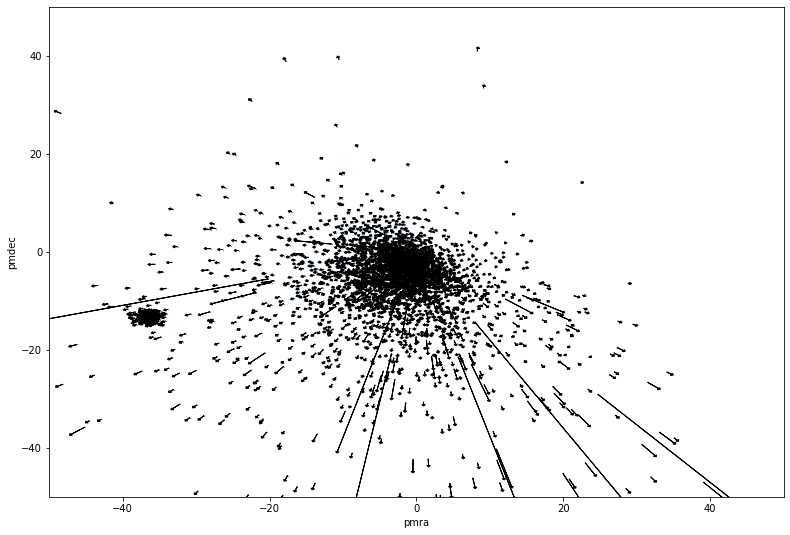

In [94]:
ax = plt.axes()
ax.scatter(beehive['pmra'], beehive['pmdec'], s=0.1)

#define arrows
arrow_starts = beehive['pmra'].values
arrow_ends = beehive['pmdec'].values

arrow_lengths_x = beehive['dx'].values
arrow_lengths_y = beehive['dy'].values

#add arrows to plot
for i, pm in enumerate(beehive['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.5,        #arrow head width
             head_length=0.3,      #arrow head length
             width=0.005,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

plt.xlim(-50,50)
plt.ylim(-50,50)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

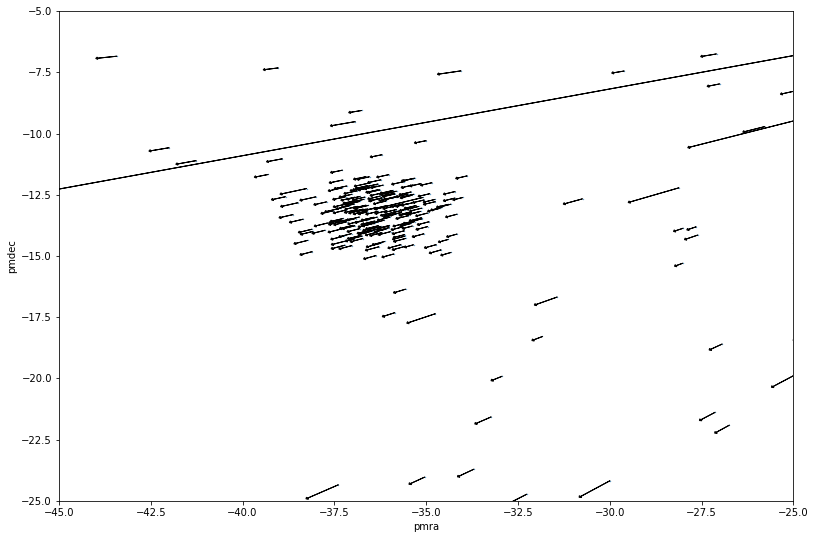

In [95]:
ax = plt.axes()
ax.scatter(beehive['pmra'], beehive['pmdec'], s=0.1)

#define arrows
arrow_starts = beehive['pmra'].values
arrow_ends = beehive['pmdec'].values

arrow_lengths_x = beehive['dx'].values
arrow_lengths_y = beehive['dy'].values

#add arrows to plot
for i, pm in enumerate(beehive['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.1,         #arrow head width
             head_length=0.05,       #arrow head length
             width=0.001,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

plt.xlim(-45,-25)
plt.ylim(-25,-5)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

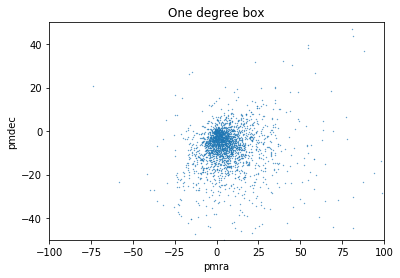

In [7]:
one_degree_box = pd.read_csv("1degree.csv")
plt.scatter(one_degree_box['pmra'], one_degree_box['pmdec'], s=0.1)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-100, 100)
plt.ylim(-50, 50)
plt.title("One degree box")
plt.show()

In [39]:
one_degree_box = one_degree_box[['parallax', 'pmra', 'pmdec']]
one_degree_box.loc[:, 'parallax_arcsec'] = one_degree_box['parallax'].apply(lambda x: x*.001)
one_degree_box.loc[:, 'R_pc'] = one_degree_box['parallax_arcsec'].apply(distance)
one_degree_box.loc[:, 'R_kpc'] = one_degree_box['R_pc'].apply(lambda x: x*.001)
one_degree_box.loc[:, 'pm'] = one_degree_box.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
one_degree_box.loc[:, 'vel_t_km/s'] = one_degree_box.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
one_degree_box.head(10)

,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.345412,4.188321,-8.079128,0.000345,2895.093026,2.895093,9.100239,26.346038
2,-0.208778,1.454527,-1.324278,-0.000209,0.000000,0.000000,1.967069,0.000000
3,0.382521,-1.734745,-2.584722,0.000383,2614.233439,2.614233,3.112897,8.137840
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.141359,58.473849,-26.433618,0.004141,241.466658,0.241467,64.171077,15.495176
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.008680,-1.973189,-0.573069,-0.000009,0.000000,0.000000,2.054722,0.000000
